In [1]:
import cv2
import numpy
from PIL import Image, ImageOps
import pytesseract

In [2]:
def cv2pil(img):
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def pil2cv(img):
    return cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)

Pillow docs: https://pillow.readthedocs.io/

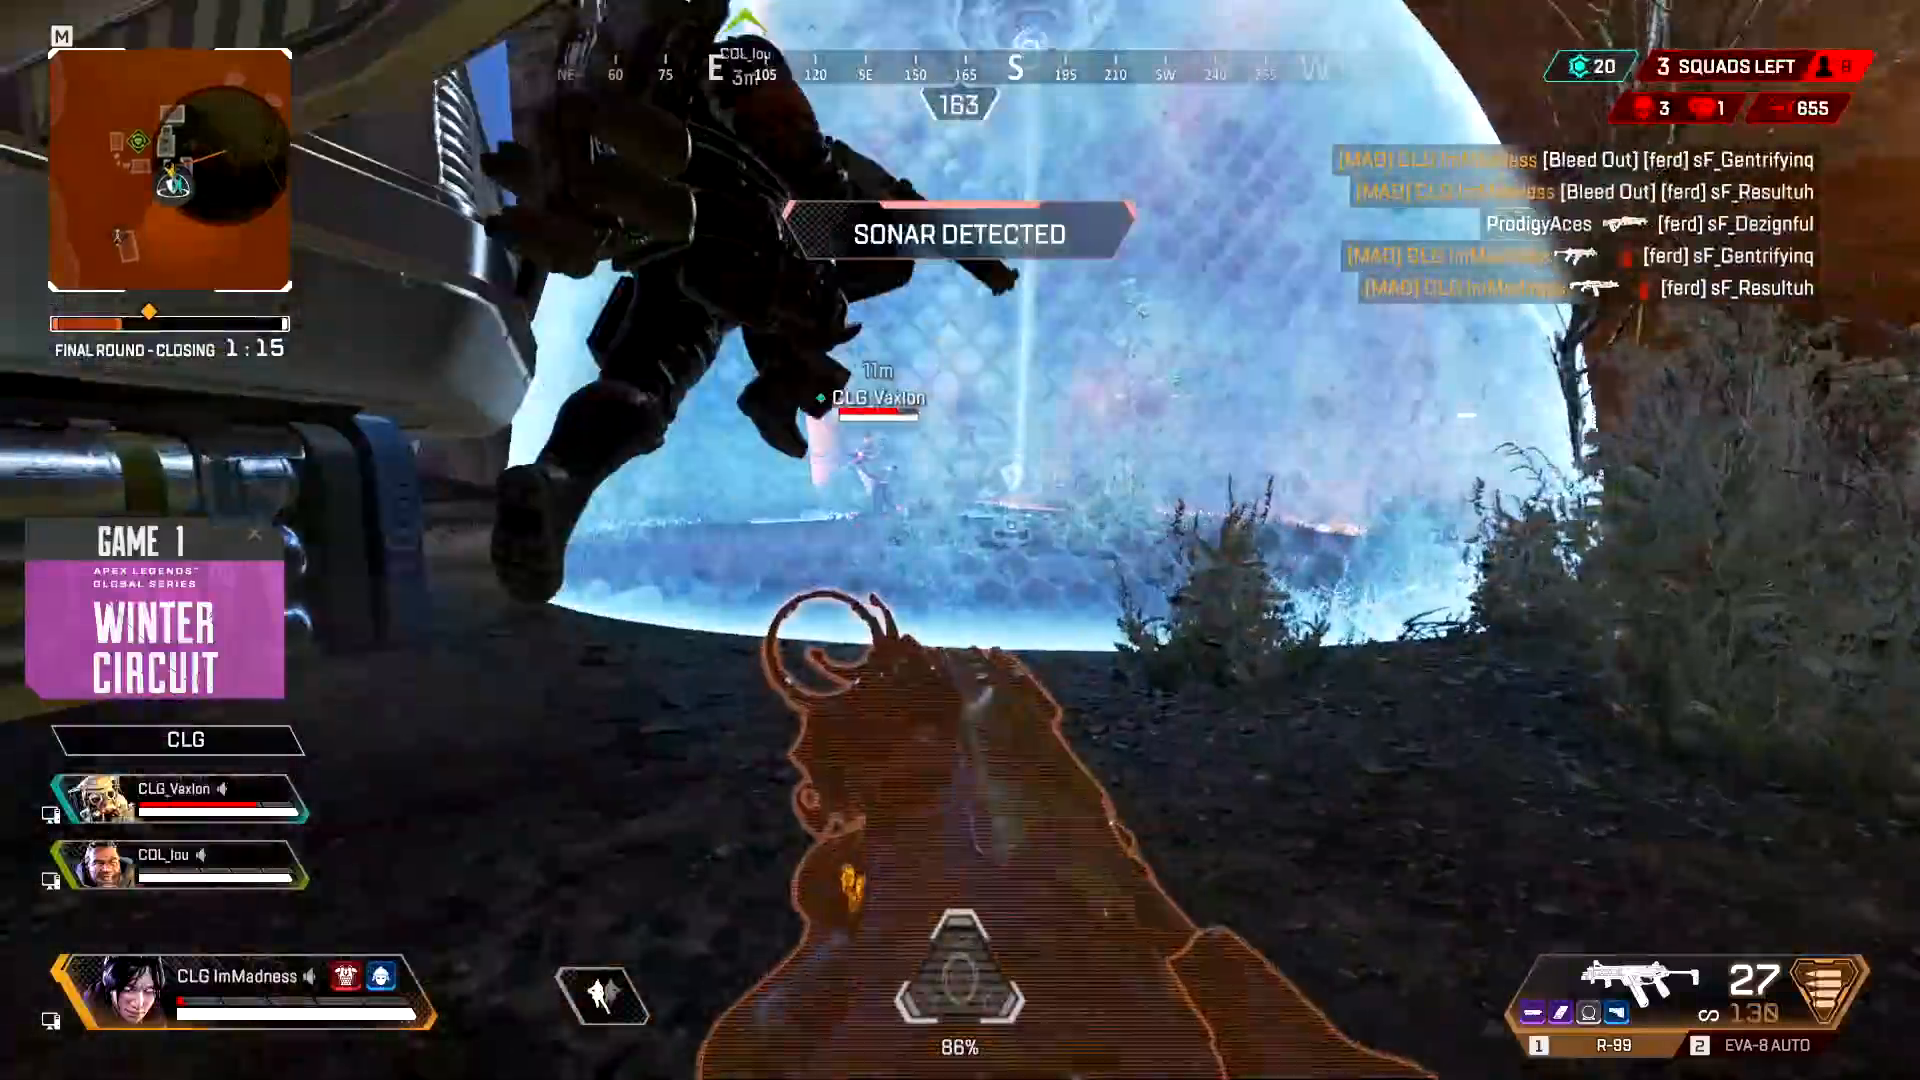

In [3]:
frame = Image.open('2021-03-27_965657358_1080p/001470.png')
frame

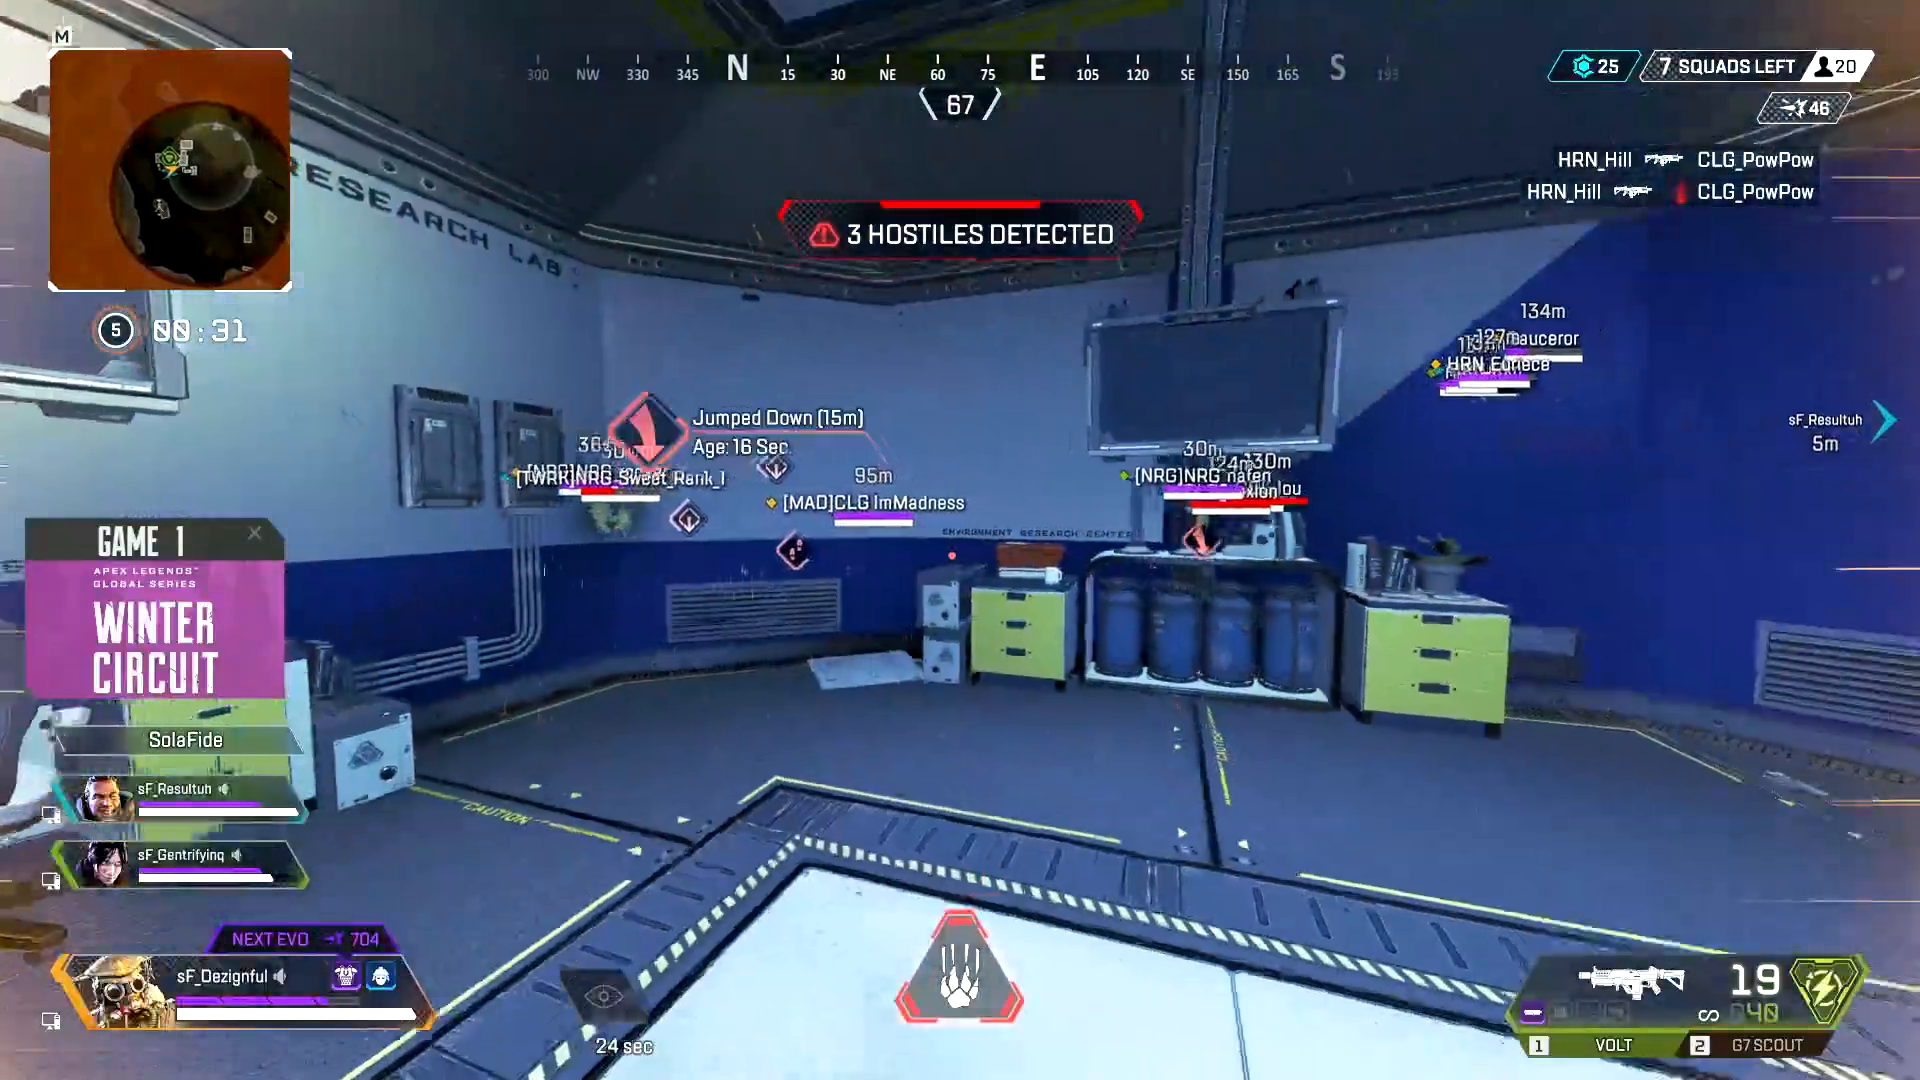

In [4]:
frame2 = Image.open('2021-03-27_965657358_1080p/001380.png')
frame2

In [5]:
frame.size

(1920, 1080)

In [6]:
# Read player names from bottom left

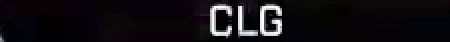

In [7]:
ImageOps.scale(frame.crop((63, 729, 288, 750)), 2.0, Image.NEAREST)

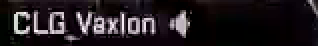

In [8]:
ImageOps.scale(frame.crop((132, 777, 291, 800)), 2.0, Image.NEAREST)

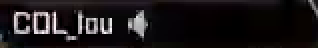

In [9]:
ImageOps.scale(frame.crop((132, 843, 291, 867)), 2.0, Image.NEAREST)

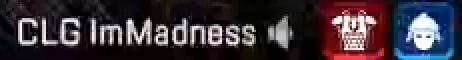

In [10]:
ImageOps.scale(frame.crop((169, 960, 400, 990)), 2.0, Image.NEAREST)

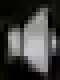

In [11]:
ImageOps.scale(frame.crop((301, 966, 316, 986)), 4.0, Image.NEAREST)

In [12]:
# Read weapons from bottom right

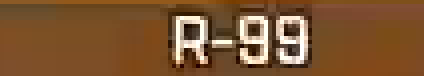

In [13]:
ImageOps.scale(frame.crop((1554, 1035, 1660, 1054)), 4.0, Image.NEAREST)

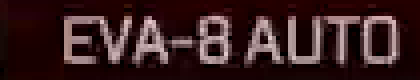

In [14]:
ImageOps.scale(frame.crop((1710, 1035, 1815, 1055)), 4.0, Image.NEAREST)

In [15]:
# Read character portraits from bottom left

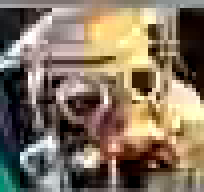

In [16]:
ImageOps.scale(frame.crop((75, 774, 126, 822)), 4.0, Image.NEAREST)

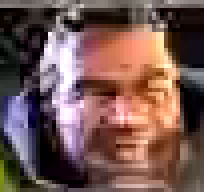

In [17]:
ImageOps.scale(frame.crop((75, 840, 126, 888)), 4.0, Image.NEAREST)

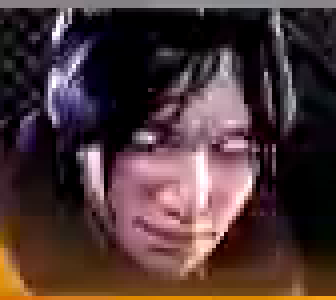

In [18]:
ImageOps.scale(frame.crop((91, 954, 175, 1029)), 4.0, Image.NEAREST)

In [19]:
# Read round number and clock from top left

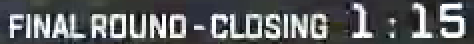

In [20]:
ImageOps.scale(frame.crop((51, 337, 288, 359)), 2.0, Image.NEAREST)

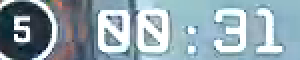

In [21]:
ImageOps.scale(frame2.crop((105, 315, 255, 345)), 2.0, Image.NEAREST)

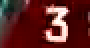

In [22]:
ImageOps.scale(frame.crop((1635, 54, 1680, 78)), 2.0, Image.NEAREST)

In [23]:
frame.crop((301, 966, 316, 986)).save('player_name_end_icon.png')
tpl = cv2.imread('player_name_end_icon.png')

In [24]:
haystack = frame.crop((169, 960, 400, 990))
haystack

In [25]:
result = cv2.matchTemplate(pil2cv(haystack), tpl, cv2.TM_CCOEFF_NORMED)

In [26]:
_, max_value, _, max_location = cv2.minMaxLoc(result)
max_value, max_location

(1.0, (132, 6))

In [27]:
cv2pil(cv2.rectangle(pil2cv(haystack), max_location, (max_location[0] + tpl.shape[1], max_location[1] + tpl.shape[0]), (0, 0, 255), 1))

In [28]:
cropped = haystack.crop((0, 0, max_location[0], haystack.size[1]))
cropped

In [29]:
pytesseract.image_to_string(cropped)

'Pea ty\n\x0c'

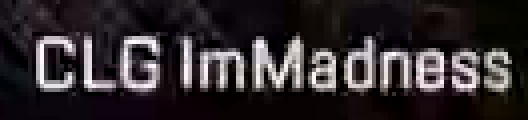

In [30]:
scaled = ImageOps.scale(cropped, 4.0, Image.NEAREST)
scaled

In [31]:
pytesseract.image_to_string(scaled)

'ee clgeee\n\x0c'

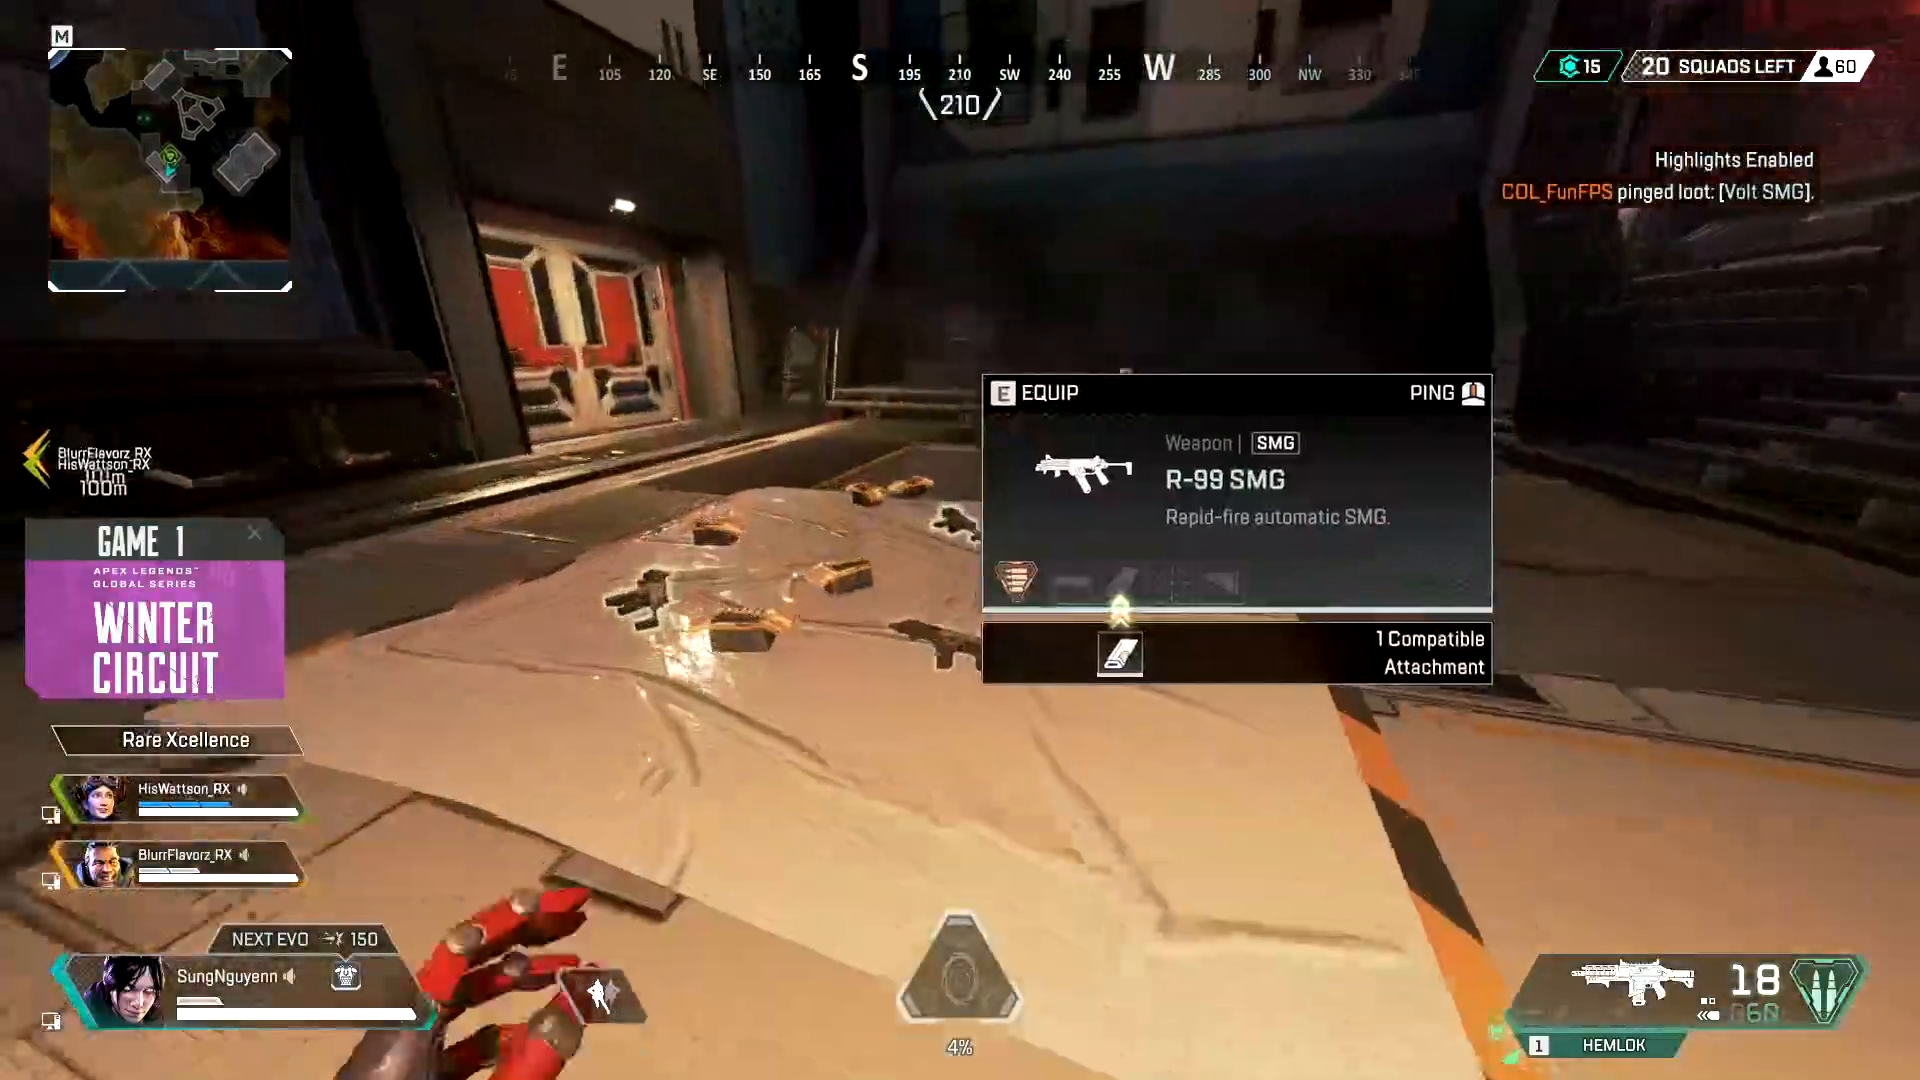

In [32]:
frame3 = Image.open('2021-03-27_965657358_1080p/000847.png')
frame3

In [33]:
haystack = frame3.crop((169, 960, 400, 990))
haystack

In [34]:
result = cv2.matchTemplate(pil2cv(haystack), tpl, cv2.TM_CCOEFF_NORMED)

In [35]:
_, max_value, _, max_location = cv2.minMaxLoc(result)
max_value, max_location

(0.9611164331436157, (112, 6))

In [36]:
cv2pil(cv2.rectangle(pil2cv(haystack), max_location, (max_location[0] + tpl.shape[1], max_location[1] + tpl.shape[0]), (0, 0, 255), 1))

In [37]:
cropped = haystack.crop((0, 0, max_location[0], haystack.size[1]))
cropped

In [38]:
pytesseract.image_to_string(cropped)

'SungNguyenn\n\x0c'

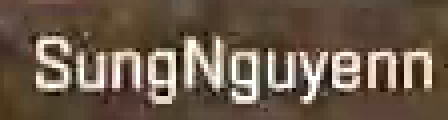

In [39]:
scaled = ImageOps.scale(cropped, 4.0, Image.NEAREST)
scaled

In [40]:
pytesseract.image_to_string(scaled)

'sungNguyenn\n\x0c'

In [41]:
array = numpy.array(scaled)
new_array = numpy.zeros((array.shape[0], array.shape[1]), dtype=numpy.uint8)
THRESHOLD = int(0.4 * 255)
for y in range(array.shape[0]):
    for x in range(array.shape[1]):
        if numpy.mean(array[y][x]) < THRESHOLD:
            new_array[y][x] = 255
        else:
            new_array[y][x] = 255 - numpy.mean(array[y][x])

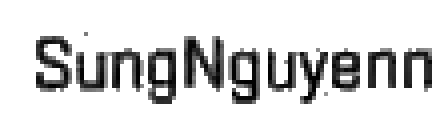

In [42]:
Image.fromarray(new_array)

In [43]:
pytesseract.image_to_string(Image.fromarray(new_array))

'SungNguyenn\n\x0c'

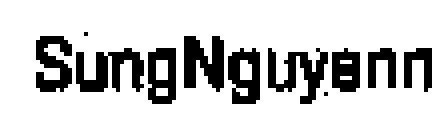

In [44]:
Image.fromarray(numpy.mean(array, axis=2) <= THRESHOLD)